In [4]:
import pandas as pd
import numpy as np
import os

# 👀 Model Suspicion Score 

In [24]:
# Path to your csv file
csv_file_path = '/Users/amyzhang/Desktop/A6_Dashboard/AZ_sisyphus/CF6.7/cooling_boiler_df_FINAL.csv'

# Import 
cooling_boiler_df = pd.read_csv(csv_file_path)  

# Verify the import
print(cooling_boiler_df.dtypes.to_string())

/var/folders/6r/kznwmt6j1rsfwtfplchqpwj00000gn/T/ipykernel_91165/3599201801.py:5: DtypeWarning: Columns (38,58) have mixed types. Specify dtype option on import or set low_memory=False.
  cooling_boiler_df = pd.read_csv(csv_file_path)


utility_id                                int64
state                                    object
plant_code                                int64
plant_name                               object
year                                      int64
month                                     int64
generator_id                             object
boiler_id                                object
cooling_id                               object
generator_primary_technology             object
summer_cap_steam_turbines_mw            float64
gross_gen_steam_turbines_mwh            float64
net_gen_steam_turbines_mwh              float64
summer_cap_single_shaft_mw              float64
gross_gen_single_shaft_mwh              float64
net_gen_single_shaft_mwh                float64
summer_cap_combined_cycle_gt_mw         float64
gross_gen_combined_cycle_gt_mwh         float64
net_gen_combined_cycle_gt_mwh           float64
fuel_consump_all_fuel_types_mmbtu       float64
fuel_consump_steam_turbines_mmbtu       

In [26]:
cooling_boiler_df.shape

(751500, 84)

In [28]:
flag_cols = [
    'cooling_type_mismatch',
    'unknown_cooling_with_water',
    'flag_row_is_negative',
    'zero_withdraw_and_consume',
    'copycat_flag',
    'flag_unoperable_with_water'
]

cooling_boiler_df['suspicion_score'] = cooling_boiler_df[flag_cols].sum(axis=1)


In [33]:
cooling_boiler_df['suspicion_score'].value_counts(dropna=False)

suspicion_score
0    439832
1    288086
2     22683
3       899
Name: count, dtype: int64

In [50]:
cooling_boiler_df['configuration_type'].value_counts()

configuration_type
1C MB MG      320430
Complex       185763
Unoperable    145261
Simple         66193
1C 1B MG       23483
1C MB 1G        5930
MC 1B MG        2352
MC 1B 1G        1584
MC MB 1G         504
Name: count, dtype: int64

In [56]:
cooling_boiler_df['cooling_status_full'].value_counts()

cooling_status_full
Operating / Active            569112
Retired                       102456
Missing                        62508
Construction                    4920
Planned                         3672
Out of Service / Operation      3264
Canceled                        2040
Standby                         1740
Scheduled                       1260
Test / Temporary Shutdown        528
Name: count, dtype: int64

In [61]:
cooling_boiler_df['flag_operable_missing_water'] = (
    (cooling_boiler_df['configuration_type'] != 'Unoperable') &
    (cooling_boiler_df['cooling_status'] == 'OP') &
    (
        (cooling_boiler_df['water_withdrawal_volume_mg'].isna() | 
         (cooling_boiler_df['water_withdrawal_volume_mg'] == 0)) &
        (cooling_boiler_df['water_consumption_volume_mg'].isna() | 
         (cooling_boiler_df['water_consumption_volume_mg'] == 0))
    )
)


In [69]:
flag_cols_1 = [
    'cooling_type_mismatch',
    'unknown_cooling_with_water',
    'flag_row_is_negative',
    'zero_withdraw_and_consume',
    'copycat_flag',
    'flag_unoperable_with_water',
    'flag_operable_missing_water'
]

cooling_boiler_df['suspicion_score_1'] = cooling_boiler_df[flag_cols_1].sum(axis=1)


In [71]:
cooling_boiler_df['suspicion_score_1'].value_counts()

suspicion_score_1
0    376464
1    285858
2     74767
3     14402
4         9
Name: count, dtype: int64

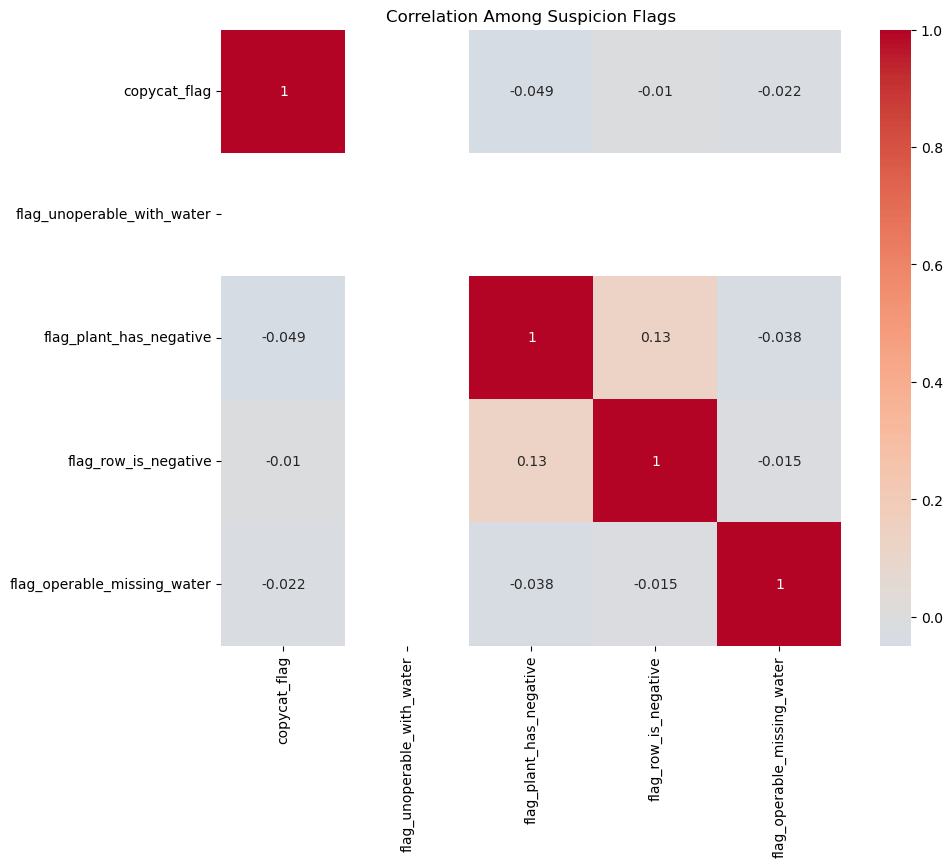

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select just the flag columns
flag_cols = [col for col in cooling_boiler_df.columns if col.startswith('flag_') or col.endswith('_flag')]
flag_df = cooling_boiler_df[flag_cols].astype(int)

# Compute correlation matrix
corr_matrix = flag_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Among Suspicion Flags')
plt.show()
